<center><h1> Compte rendu TP2 </h1></center>

# Simulation du jeux de LIDO simplifié

## Principe
On considére un jeux de Lido simple:
on dispose d'un un seul pion.

- Etape 0 :
Le pion doit sort de sa prison lorsqu'on obtient un 6.

- Etape 1 :
Le pion doit atteindre exactement une position cible situé à N pas de distance de sa prison 

Soit $X_n$ la variable aléatoire qui represente le nombre de coup nécéssaire pour atteindre la positions cible.

**Objectif 1** : Simuler le jeux 

**Objectif 2** : Calculer une estimation de l'éspérance mathématique de $X_n$ en utilisant `python`

**Objéctif 3** : Observer la variation de $\mathbb{E}(X_n)$ en fonction de $n$

<img src="LIDO.png">


In [3]:
import numpy as np

### Simulation du lancé de dé

In [4]:
def Roll():
    return int(np.random.choice(range(1,7),1))

In [5]:
Roll()

3

### Compléter le code et commenter

In [6]:
NA,A,S=0,0,10
temp=Roll()
while temp!=6:
    NA=NA+1 #nb essais ykadem
    temp=Roll()
    print("temp=",temp,"|NA=",NA,"A=",A)
A=1
print("temp=",temp,"|NA=",NA,"A=",A)
while A!=S:
    temp=Roll()
    NA=NA+1
    print("temp=",temp,"|NA=",NA,"A=",A)
    if A+temp<S:
        A=A+temp
        print("temp=",temp,"|NA=",NA,"A=",A)
    elif A+temp==S:
        A=S
    else:
        print("temp=",temp,"|NA=",NA,"A=",A)
        continue

temp= 6 |NA= 0 A= 1
temp= 3 |NA= 1 A= 1
temp= 3 |NA= 1 A= 4
temp= 2 |NA= 2 A= 4
temp= 2 |NA= 2 A= 6
temp= 6 |NA= 3 A= 6
temp= 6 |NA= 3 A= 6
temp= 6 |NA= 4 A= 6
temp= 6 |NA= 4 A= 6
temp= 6 |NA= 5 A= 6
temp= 6 |NA= 5 A= 6
temp= 1 |NA= 6 A= 6
temp= 1 |NA= 6 A= 7
temp= 2 |NA= 7 A= 7
temp= 2 |NA= 7 A= 9
temp= 3 |NA= 8 A= 9
temp= 3 |NA= 8 A= 9
temp= 4 |NA= 9 A= 9
temp= 4 |NA= 9 A= 9
temp= 6 |NA= 10 A= 9
temp= 6 |NA= 10 A= 9
temp= 1 |NA= 11 A= 9


# Conclusion 1
**Soit :**
* **NA** : Nombre de coup `(d'essais)`
* **A** : Somme courante

En jettant le dé la valeur obtenu sera ajouté a A `(boucle while)` jusqu'a obtenir la valeur voulu S.                 

### Simulation
Ecrire une foction `sim` qui simule le jeux et qui prend comme variable le nombre de pas $n$ nécessazire pour atteindre la cible

In [7]:
def sim(S):
    A=0
    NA=0
    temp=Roll()
    NA=1
    while (temp<6) :
        NA=NA+1
        temp=Roll()
        #print(temp,NA,A)
    A=1
    #print(temp,NA,A)
    while A!=S:
        temp=Roll()
        NA=NA+1
        #print(temp,NA,A)
        if A+temp<S:
            A=A+temp
            #print(temp,NA,A)
        elif A+temp==S:
            A=S
            #print(temp,NA,A)
    return NA
    

In [8]:
sim(20)

22

# Conclusion 2 
Tand que **A#S** `faire`:

* A recoit **A +la valeur de la face obtenu après le lancement du dé** que temp la mit.
      

### Simulation de $10^5$  scénario 

In [9]:
Freq=np.fromiter((sim(20) for i in range(10**4)),dtype=int)

In [10]:
ESP=Freq.sum()/10**5
ESP

1.61488

In [11]:
x=list(range(10,20))

In [12]:
y=[np.fromiter((sim(u) for i in range(10**4)),dtype=int).sum()/10000 for u in x]

In [13]:
import matplotlib.pyplot as plt

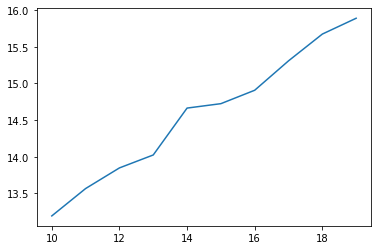

In [21]:
plt.plot(x,y)

In [22]:
from scipy import stats
import numpy as np
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

In [23]:
slope

0.29741757575757566

In [24]:
intercept


10.267235151515152

In [25]:
yy=[slope*u+intercept for u in x]

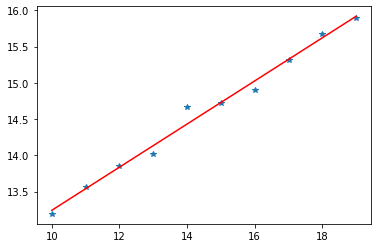

In [26]:
plt.plot(x,y,'*',x,yy,'r-')

# Conclusion 3

Le **but** c'est d'avoir `l'estimation moyenne` et on a fait le `plot` pour essayer de dégager **une relation math** sous forme de **droite** (relation entre x et y ) et la droite rouge (qui passe presque par le points) confirme.
Donc on peut `estimer` quelque soit la valeur de S `le nombre de coup au moyenne`.